In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df  = pd.read_csv("/content/ENB2012_data.csv")
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [ ]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

<Axes: >

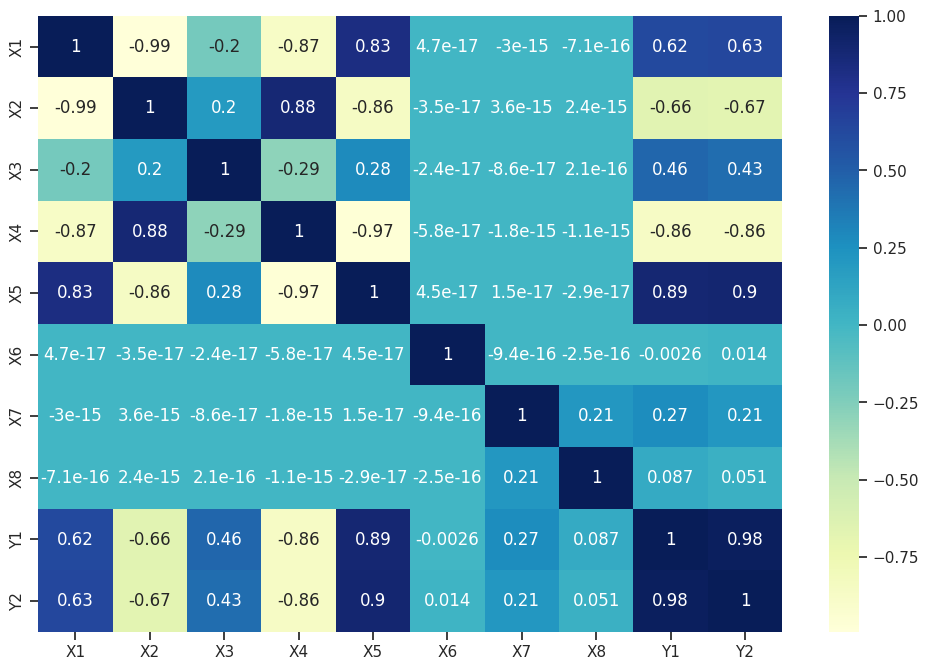

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot =True, cmap="YlGnBu")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop(['Y1', 'Y2'], axis=1)
y = df[['Y1', 'Y2']]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso

# Split the dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the Ridge and Lasso models
ridge = Ridge()
lasso = Lasso()

# Train the models
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# Evaluate the models
from sklearn.metrics import mean_squared_error

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print('Ridge MSE:', mse_ridge)
print('Lasso MSE:', mse_lasso)


Ridge MSE: 9.964382196756704
Lasso MSE: 21.69011569085987


In [ ]:
# Train the models on the entire training set
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

y_pred_ridge
y_pred_lasso

array([[16.99153179, 19.06784153],
       [14.15972099, 17.05281713],
       [32.9477102 , 34.86578881],
       [29.04488947, 30.60731858],
       [15.89945359, 18.06032933],
       [27.79089766, 29.59980638],
       [32.7857966 , 34.86578881],
       [32.7857966 , 34.86578881],
       [15.41371279, 18.06032933],
       [32.01079603, 33.78213613],
       [15.73753999, 18.06032933],
       [37.18867685, 37.81218493],
       [32.17270962, 33.78213613],
       [11.04539996, 14.03028053],
       [16.06136718, 18.06032933],
       [36.86484965, 37.81218493],
       [37.35059045, 37.81218493],
       [10.88348636, 14.03028053],
       [11.81365097, 15.03779273],
       [37.18867685, 37.81218493],
       [27.62898407, 29.59980638],
       [28.55914867, 30.60731858],
       [14.15972099, 17.05281713],
       [29.04488947, 30.60731858],
       [16.06136718, 18.06032933],
       [29.04488947, 30.60731858],
       [31.84888243, 33.78213613],
       [27.62898407, 29.59980638],
       [15.41371279,